In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd

# rangedf
### Transform Tick Data into OHLCV Range Dataframe!
![SegmentLocal](readme_files/rangedf-anim.gif "segment")

-----

## Installation
### &nbsp;&nbsp;&nbsp;`pip install rangedf`
### or just copy *rangedf.py* file to your project!
   - rangedf requires [pandas](https://pypi.org/project/pandas/), [numpy](https://pypi.org/project/numpy/) and [mplfinance](https://pypi.org/project/mplfinance/)

---

# Content
  - **[Usage](#usage)**
  - **[Animation/Realtime Range Chart](#anim)**
  - **[Is the Range chart calculated correctly?](#calculated)**

---

# <a name="usage"></a>Usage

There are two classes available:
* `Range(df, range_size, keep_inner_gap, add_columns)`
<br>To create Range OHLCV dataframe with existing Ticks data.
* `RangeWS(timestamp, price, range_size, keep_inner_gap, external_df, external_mode)`
<br>To create real-time Range charts, usually over a **WebSocket** connection.

Let's start with the first class, load a Pandas DataFrame containing Ticks Data, for example:

In [2]:
import pandas as pd
df_ticks = pd.read_parquet('examples/data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)
df_ticks.head(3)
df_ticks.tail(3)

,ask,close,spread
datetime,,,
2025-05-08 00:00:00.678,0.85047,0.85043,0.00004
2025-05-08 00:00:00.848,0.85047,0.85045,0.00002
2025-05-08 00:00:02.000,0.85046,0.85045,0.00001


,ask,close,spread
datetime,,,
2025-05-15 23:59:46.238,0.84130,0.84126,0.00004
2025-05-15 23:59:50.844,0.84129,0.84125,0.00004
2025-05-15 23:59:54.240,0.84130,0.84125,0.00005


---
Only two columns are required:
   * `close`: Mandatory.
   * `datetime`: If is not present, the index will be used.
<br>You can add other columns if you want, just put a list with their names in the `add_columns` parameter.
       
After importing rangedf and setting `range_size`, just call `range_df()` with the chosen mode name.<br> 
**See all available modes in [rangedf_modes.ipynb](./examples/rangedf_modes.ipynb)**

In [3]:
from rangedf import Range
r = Range(df_ticks, range_size=0.0003)
df = r.range_df() # 'normal' = default 
df.head(3)
df.tail(3)

,open,high,low,close,volume
datetime,,,,,
2025-05-08 00:20:02.244,0.85052,0.85077,0.85047,0.85077,560.0
2025-05-08 00:37:55.846,0.85077,0.85103,0.85073,0.85103,358.0
2025-05-08 00:55:00.448,0.85105,0.85112,0.85082,0.85082,532.0


,open,high,low,close,volume
datetime,,,,,
2025-05-15 21:39:16.453,0.84065,0.84091,0.84061,0.84091,185.0
2025-05-15 22:01:40.657,0.84091,0.84094,0.84064,0.84094,432.0
2025-05-15 23:53:39.843,0.84095,0.84108,0.84078,0.84108,1367.0


You can use `mpf.plot()` or `r.plot()`, as in the example below.

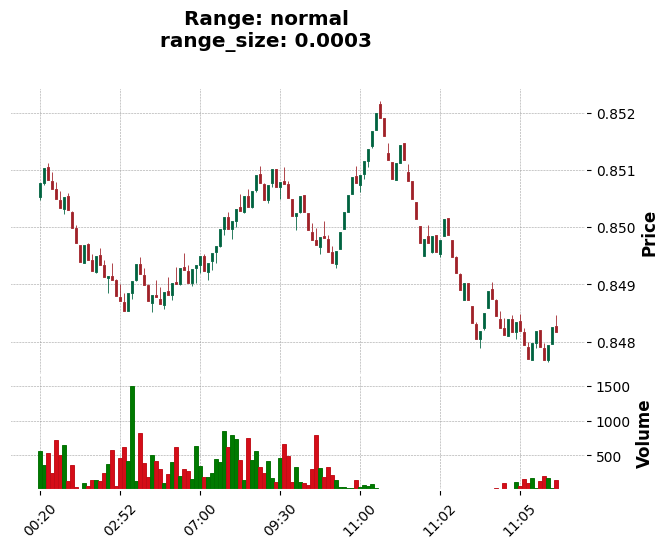

In [4]:
import mplfinance as mpf
mpf.plot(df.iloc[:130], type='candle', volume=True, style="charles", 
         title=f"Range: normal\nrange_size: 0.0003")
mpf.show()
# same as:
# r.plot('normal')

As described in [rangedf_modes.ipynb](./examples/rangedf_modes.ipynb), we can have multiple dataframes of different modes from the same instance.

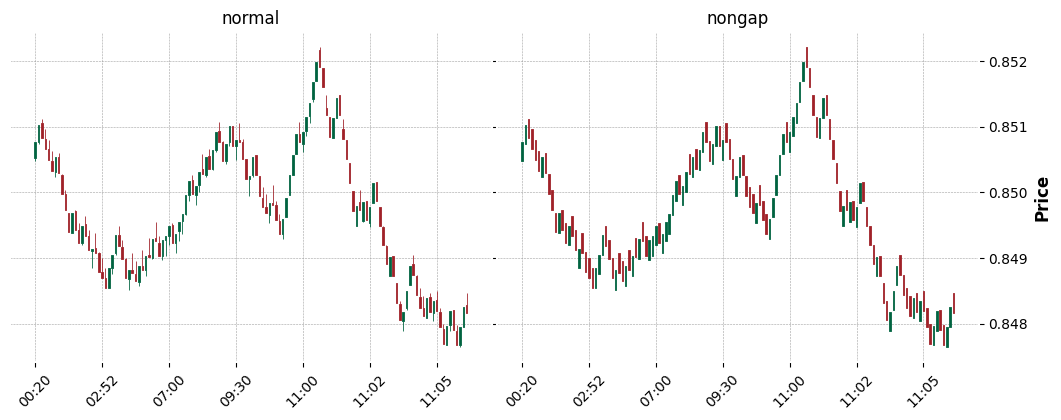

In [5]:
df_normal = r.range_df()
df_nongap = r.range_df('nongap')

fig = mpf.figure(style='charles', figsize=(12.5,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

mpf.plot(df_normal.iloc[:130],type='candle',ax=ax1,axtitle='normal')
mpf.plot(df_nongap.iloc[:130],type='candle',ax=ax2,axtitle='nongap')
mpf.show()

# <a name="anim"></a>Animation/Real-time Range Chart
To run the animation examples, clone this repository, then into the `rangedf/examples` folder, run:

 * python ws_animchart_demo.py 
 * python ws_multichart_demo.py
 * python ws_externaldf_demo.py

**NOTE:** There are comments, in each of the above example files, talking about situations or recommendations to be applied in real cases.

# <a name="calculated"></a>Is the Range chart calculated correctly?
I also asked myself the same question, how about we see for ourselves? <br>
We are going to do this based on *Spotware's FX/CFD Trading Platform* called **cTrader**,<br>
using *IC Markets/Trading* as a Price Provider. 
#### **[Let's go!](./examples/comparison_ctrader.ipynb)**

**RESUME**: Despite the possible occurrence of more/less bars in cases of gap, the range calculation is practically the same or very approximate.

### Non-Affiliation Disclaimer
I'm not endorsed by, directly affiliated with, maintained, authorized, or sponsored by any company previously mentioned. 
All product and company names are the registered trademarks of their original owners. 
The use of any trade name or trademark is for identification and reference purposes only and does not imply any association with the trademark holder of their product brand.